# K-Means
## 聚类
聚类，简单来说，就是将一个庞杂数据集中具有相似特征的数据自动归类到一起，称为一个簇，簇内的对象越相似，聚类的效果越好。它是一种无监督的学习(Unsupervised Learning)方法,不需要预先标注好的训练集。

聚类的目标是未知的，只能利用聚类方法将数据集分为多类，然后人为给出结果的定义（簇识别）。

## K-Means 算法
K-Means 是发现给定数据集的 K 个簇的聚类算法, 之所以称之为 K-均值 是因为它可以发现 K 个不同的簇, 且每个簇的中心采用簇中所含值的均值计算而成.
-   簇个数 K 是用户指定的, 每一个簇通过其质心（centroid）, 即簇中所有点的中心来描述.

### 术语
-   簇: 所有数据的点集合，簇中的对象是相似的。
-   质心: 簇中所有点的中心（计算所有点的均值而来）.
-   SSE: Sum of Sqared Error（误差平方和）, 它被用来评估模型的好坏，SSE 值越小，表示越接近它们的质心. 聚类效果越好。由于对误差取了平方，因此更加注重那些远离中心的点（一般为边界点或离群点）。

### **算法步骤详解**

#### **Step 1: 初始化**
- 给定 $ k $，随机选择 $ k $ 个数据点作为初始质心：
  $$
  C = \{c_1, c_2, \dots, c_k\}
  $$
- 质心的位置影响最终结果，因此初始化方法很重要（K-Means++ 是一种改进的初始化策略）。

#### **Step 2: 分配样本到最近的质心**
- 对于每个数据点 $ x_i $，计算它与所有质心 $ c_j $ 的距离：
  $$
  d(x_i, c_j) = \|x_i - c_j\|_2 = \sqrt{\sum_{m=1}^{M}(x_{im} - c_{jm})^2}
  $$
  （这里 $ M $ 是数据维度）。
- 找到最近的质心 $ c_j $，将 $ x_i $ 分配到对应的簇。

#### **Step 3: 更新质心**
- 对于每个簇 $ S_j $，计算其样本均值作为新的质心：
  $$
  c_j = \frac{1}{|S_j|} \sum_{x_i \in S_j} x_i
  $$
- 更新所有质心位置。

#### **Step 4: 迭代直到收敛**
- 重复步骤 2 和 3，直到：
  - 质心的位置变化小于某个阈值。
  - 或者达到最大迭代次数。

C:\Users\26271\AppData\Local\Temp\ipykernel_21756\2023910709.py:64: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', k)


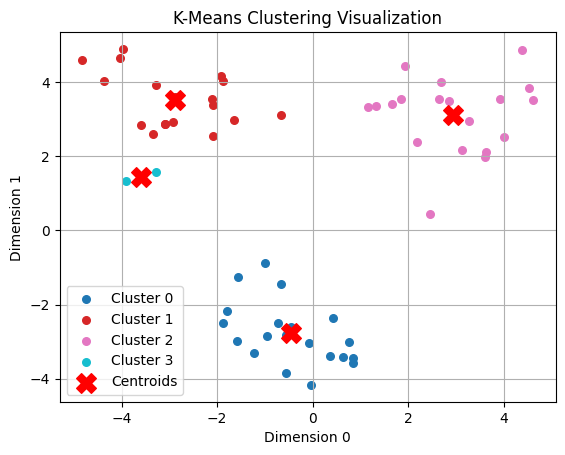

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def load_data_set(fileName):
    return np.loadtxt(fileName, delimiter='\t')

def dist_euclidean(A, B):
    return np.linalg.norm(A - B)

# 随机初始化k个质心
def random_centroids(dataMat, k):
    n = dataMat.shape[1]
    centroids = np.zeros((k, n))
    for j in range(n):
        mi = dataMat[:, j].min()
        mx = dataMat[:, j].max()
        centroids[:, j] = mi + (mx - mi) * np.random.rand(k)
    return centroids

def k_means(dataMat, k, dist_func=dist_euclidean, create_cent=random_centroids):
    m = dataMat.shape[0]
    cluster = np.zeros((m, 2)) # 每行 [簇索引, 距离平方]，一共m个样本
    centroids = create_cent(dataMat, k)
    clusterChanged = True

    while clusterChanged:
        clusterChanged = False

        # 分配样本到簇
        for i in range(m):
            distances = np.array([dist_func(dataMat[i], centroids[j]) for j in range(k)])
            minIndex = distances.argmin()
            # 如果样本的簇索引发生变化
            if cluster[i, 0] != minIndex:
                clusterChanged = True
                cluster[i] = minIndex, distances[minIndex] ** 2

        # 更新质心
        for cent in range(k):
            pointsInCluster = dataMat[cluster[:, 0] == cent]
            if len(pointsInCluster) > 0:
                centroids[cent] = pointsInCluster.mean(axis=0)
        
    return centroids, cluster

def plot_clusters(data_mat, cluster_assignment, centroids, dim1=0, dim2=1):
    """
    绘制指定两维的数据和质心的散点图。
    
    Parameters:
    - data_mat: 数据矩阵 (numpy.ndarray)。
    - cluster_assignment: 簇分配结果，每行包含 [簇索引, 距离平方]。
    - centroids: 簇质心矩阵。
    - dim1: 绘制数据时选择的第一个维度索引。
    - dim2: 绘制数据时选择的第二个维度索引。
    """
    # 获取每个数据点的簇分配索引
    clusters = cluster_assignment[:, 0].astype(int)

    # 获取簇数
    k = centroids.shape[0]

    # 创建颜色映射
    colors = plt.cm.get_cmap('tab10', k)

    # 绘制每个簇的数据点
    for cluster_idx in range(k):
        points_in_cluster = data_mat[clusters == cluster_idx]
        plt.scatter(
            points_in_cluster[:, dim1],
            points_in_cluster[:, dim2],
            s=30,
            color=colors(cluster_idx),
            label=f"Cluster {cluster_idx}"
        )
    
    # 绘制质心
    plt.scatter(
        centroids[:, dim1],
        centroids[:, dim2],
        s=200,
        c='red',
        marker='X',
        label='Centroids'
    )

    # 添加图例和标签
    plt.xlabel(f"Dimension {dim1}")
    plt.ylabel(f"Dimension {dim2}")
    plt.title("K-Means Clustering Visualization")
    plt.legend()
    plt.grid()
    plt.show()

if __name__ == '__main__':
    dataMat = load_data_set('testSet2.txt')
    centroids, cluster = k_means(dataMat, 4)
    plot_clusters(dataMat, cluster, centroids)

## K-Means的缺陷
在 kMeans 的函数测试中，可能偶尔会陷入局部最小值（局部最优的结果，但不是全局最优的结果）。 出现这个问题有很多原因，可能是k值取的不合适，可能是距离函数不合适，可能是最初随机选取的质心靠的太近，也可能是数据本身分布的问题

为了解决这个问题，我们可以对生成的簇进行后处理，一种方法是将具有最大SSE值的簇划分成两个簇。具体实现时可以将最大簇包含的点过滤出来并在这些点上运行K-均值算法，令k设为2。

为了保持簇总数不变，可以将某两个簇进行合并。有两种可以量化的办法: 合并最近的质心，或者合并两个使得SSE增幅最小的质心。 第一种思路通过计算所有质心之间的距离， 然后合并距离最近的两个点来实现。第二种方法需要合并两个簇然后计算总SSE值。必须在所有可能的两个簇上重复上述处理过程，直到找到合并最佳的两个簇为止。

以上的后处理过程太过繁琐

## 二分 K-Means 聚类算法
### **二分 K-Means 的核心思想**
- 将数据集视为一个单一簇。
- 在每次迭代中，通过将某个簇划分成两个子簇，逐步增加簇的数量，直到达到目标 $k$ 值。
- 每次划分时，选择当前误差平方和（SSE，Sum of Squared Errors）最大的簇进行划分，以减少整体误差。

---

### **二分 K-Means 的步骤**

1. **初始化**：
   - 将整个数据集视为一个初始簇。

2. **循环操作，直到簇的数量等于 $k$：**
   1. **选择需要划分的簇**：
      - 计算所有簇的 SSE（簇内误差平方和），公式为：
        $$
        SSE = \sum_{i=1}^{n} \|x_i - c_j\|^2
        $$
        其中，$x_i$ 是数据点，$c_j$ 是其对应簇的质心。
      - 选择 SSE 最大的簇进行划分，因为它是当前聚类中分布最不紧凑的簇。
   2. **对该簇执行二分 K-Means**：
      - 在该簇中应用 K-Means 算法，将其划分为两个子簇（$k=2$）。
      - 计算划分后的误差平方和。
   3. **更新簇分配**：
      - 用新生成的两个子簇替代原来的簇。
   4. **重复以上步骤，直到达到指定的 $k$ 值。

3. **输出**：
   - 返回最终的质心和分配结果。



C:\Users\26271\AppData\Local\Temp\ipykernel_21756\2023910709.py:64: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', k)


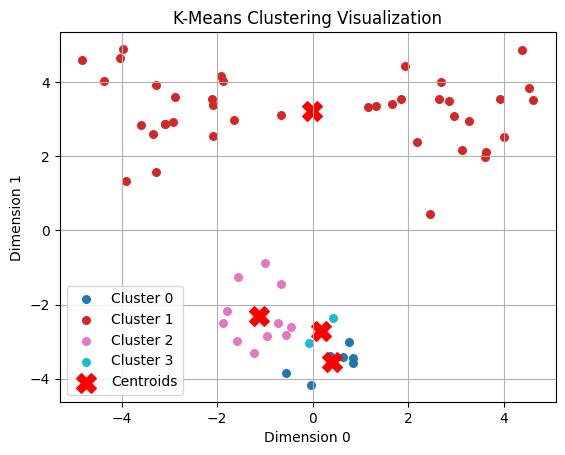

In [13]:
def calculate_sse(data, centroids, cluster_assignment):
    """计算聚类的误差平方和（SSE）"""
    sse = 0.0
    for i in range(len(data)):
        cluster_index = int(cluster_assignment[i, 0])
        sse += dist_euclidean(data[i], centroids[cluster_index])**2
    return sse

def bisecting_k_means(dataMat, k):
    m, n = dataMat.shape

    # 初始化簇，将整个数据集的质心作为第一个簇
    initialCentroid = dataMat.mean(axis=0).reshape(1, n)
    centroids = [initialCentroid]
    cluster = np.zeros((m, 2))

    # 初始化每个点的误差平方
    for i in range(m):
        cluster[i, 1] = dist_euclidean(dataMat[i], initialCentroid) ** 2

    while len(centroids) < k:
        maxSseIndex = -1  # 最大 SSE 的簇索引
        maxSse = -np.inf  # 最大 SSE 值

        # 找到 SSE 最大的簇
        for i, centroid in enumerate(centroids):
            pointsInCluster = dataMat[cluster[:, 0] == i]  # 当前簇的数据点
            if len(pointsInCluster) == 0:
                continue

            # 对当前簇进行二分 K-Means 划分
            newCentroids, tempCluster = k_means(pointsInCluster, 2)

            # 计算划分后的 SSE
            sseSplit = calculate_sse(pointsInCluster, newCentroids, tempCluster)
            # 计算未划分部分的 SSE
            sseNotSplit = calculate_sse(dataMat[cluster[:, 0] != i], centroids, cluster[cluster[:, 0] != i])

            sse = sseSplit + sseNotSplit
            if sse > maxSse:
                maxSseIndex = i
                maxSse = sse
                bestNewCentroids = newCentroids
                bestClusterAssignment = tempCluster

        # 对最大 SSE 的簇进行划分
        pointsInCluster = dataMat[cluster[:, 0] == maxSseIndex]

        # 更新质心
        centroids[maxSseIndex] = bestNewCentroids[0]  # 替换原质心
        centroids.append(bestNewCentroids[1])         # 添加新质心

        # 更新簇分配
        bestClusterAssignment[bestClusterAssignment[:, 0] == 1, 0] = len(centroids) - 1  # 新增簇编号
        bestClusterAssignment[bestClusterAssignment[:, 0] == 0, 0] = maxSseIndex        # 替换原簇编号
        cluster[cluster[:, 0] == maxSseIndex] = bestClusterAssignment  # 更新全局簇分配

    return np.array(centroids), cluster

            
if __name__ == '__main__':
    dataMat = load_data_set('testSet2.txt')
    centroids, cluster = bisecting_k_means(dataMat, 4)
    plot_clusters(dataMat, cluster, centroids)